In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

## Data prep from Thinkful

In [2]:
# Load the data again. Keep air quality data, drop the index column
# and any missing data columns.
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv').iloc[:,1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Make some new features to capture potential quadratic and cubic
# relationships between variables.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]

## Regularization parameter: LASSO

The $\lambda$ for lasso can var between 0 (no penalty, acts like OLS) and infinity.  If $\lambda$ is too large, all parameters will be set to zero.  

Create a plot below of how $R^2$ varies across different values of $\lambda$ for ridge and lasso regression. Use logic and code similar to the ridge regression demonstration above, and base your plot on the X_train2 feature set.

Do lasso and ridge yield the same $R^2$ for a given lambda value?

Submit your work and discuss the results with your mentor.

In [16]:
# Create a dictionary to hold summary data
lambda_values = np.arange(0.1,500,0.1)
summary_dictionary = {'lambda':lambda_values,
                      'ridge_rsq':[],
                      'lasso_rsq':[]}

for value in lambda_values:
    lasso = linear_model.Lasso(alpha=value)
    lasso.fit(X_train2, Y_train)
    summary_dictionary['lasso_rsq'].append(lasso.score(X_train2, Y_train))
    
    ridge = linear_model.Ridge(alpha=value)
    ridge.fit(X_train2, Y_train)
    summary_dictionary['ridge_rsq'].append(ridge.score(X_train2, Y_train))
    
regression_rsq = pd.DataFrame(summary_dictionary)

In [17]:
regression_rsq.head()

,lambda,lasso_rsq,ridge_rsq
0,0.1,0.563089,0.573972
1,0.2,0.531235,0.573972
2,0.3,0.478145,0.573972
3,0.4,0.403815,0.573972
4,0.5,0.308250,0.573972


###### R-squared for Ridge & LASSO regression across a range of lambda values (note the different y limits)

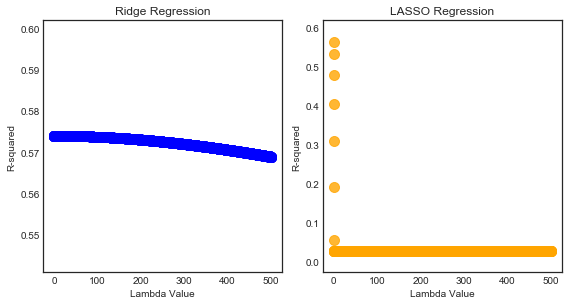

In [18]:
plt.figure(figsize=(8,8))

ax1 = plt.subplot(221)
sns.regplot(x='lambda', 
            y='ridge_rsq', 
            data=regression_rsq,
            fit_reg=False,
            color='blue',
           scatter_kws={"s":100})

ax1.set_title('Ridge Regression')
ax1.set_ylabel('R-squared')
ax1.set_xlabel('Lambda Value')

ax2 = plt.subplot(222)
sns.regplot(x='lambda', 
            y='lasso_rsq', 
            data=regression_rsq,
            fit_reg=False,
            color='orange',
            scatter_kws={"s":100})

ax2.set_title('LASSO Regression')
ax2.set_ylabel('R-squared')
ax2.set_xlabel('Lambda Value')

plt.tight_layout()
plt.show()

R-squared drops to its minimum before lambda=1 in LASSO regression, and depreciates slowly across values in ridge regression. Lambda should be tuned on different scales for the two types of regression.